# การจัดกลุ่มข้อมูล (Clustering/Segmentation)

[Comparing different clustering algorithms on toy datasets](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import  KMeans
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# โหลดข้อมูล
telco_user=pd.read_csv("https://github.com/praisan/hello-world/raw/master/churn_data.csv")
telco_user

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,IntPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,1,77,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276,0
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,57,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271,0
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,109,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230,0
3331,184,0,213.8,159.6,139.2,5.0,2,1,0,105,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381,0


In [6]:
# เลือกข้อมูลที่ต้องการนำไปวิเคราะห์
user_feature=telco_user.loc[telco_user.Churn==1,['DayMins',	'EveMins','NightMins']]
user_feature.describe()

,DayMins,EveMins,NightMins
count,483.000000,483.000000,483.000000
mean,206.914079,212.410145,205.231677
std,68.997792,51.728910,47.132825
min,0.000000,70.900000,47.400000
25%,153.250000,177.100000,171.250000
50%,217.600000,211.300000,204.800000
75%,265.950000,249.450000,239.850000
max,350.800000,363.700000,354.900000


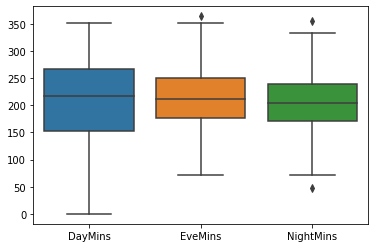

In [7]:
sns.boxplot(data=user_feature)

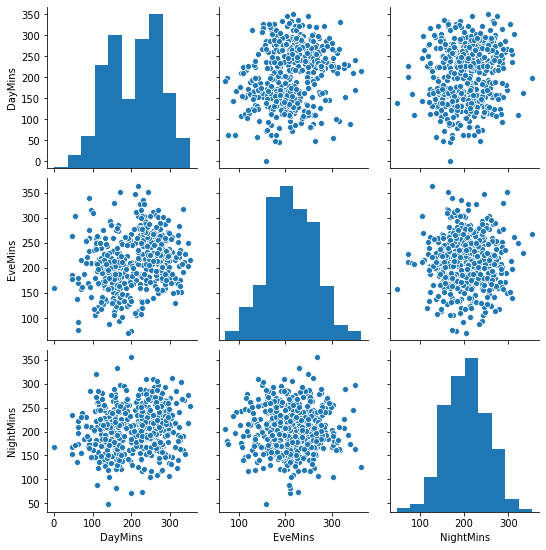

In [8]:
# plot ดูการกระจายตัวของข้อมูลและ plot แต่ละคู่ของ feature
sns.pairplot(user_feature)

In [9]:
# จัดกลุ่มข้อมูลโดยใช้จำนวน Cluster เป็น 2
kmean=KMeans(n_clusters=2)
user_segment_2c = kmean.fit(user_feature)

Text(0.5, 1.0, 'Cluster member')

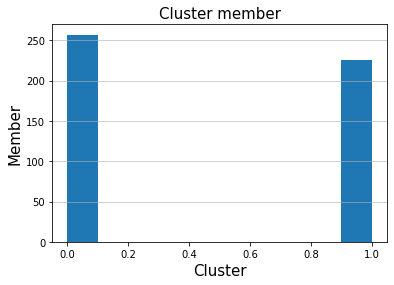

In [10]:
# แสดงจำนวนสมาชิกใน Cluster
plt.hist(user_segment_2c.labels_)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Member',fontsize=15)
plt.title('Cluster member',fontsize=15)

In [11]:
# ผลที่ได้จากการจัดกลุ่มข้อมูล
print("- Cluster center")
print(user_segment_2c.cluster_centers_)
print("- WCSSE")
print(user_segment_2c.inertia_)
print("- Cluster/Segment")
print(user_segment_2c.labels_)

- Cluster center
[[261.60272374 234.18871595 213.70233463]
 [144.72389381 187.64424779 195.59911504]]
- WCSSE
2712540.332287456
- Cluster/Segment
[1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0
 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0
 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1
 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1
 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 1 0 0 

In [12]:
# ทดลองบันทึก Model ของการจัดกลุ่ม
from sklearn.externals import joblib
joblib.dump(user_segment_2c,'finalized_model.model')
#pickle.dumps(user_segment_2c, 'telco_segment_2c.model')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['finalized_model.model']

Text(0.5, 1.0, 'Cluster member')

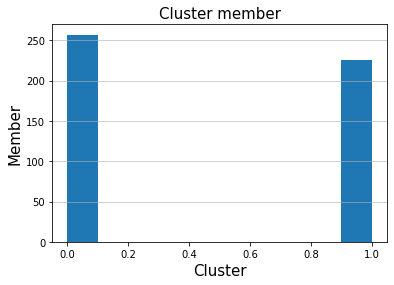

In [13]:
# ทดลองโหลด โมเดลมาใช้
segment_model=joblib.load('finalized_model.model')
segment_result=segment_model.predict(user_feature)

plt.hist(segment_result)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Member',fontsize=15)
plt.title('Cluster member',fontsize=15)

## ฝึกปฏิบัติ 1
ใช้ fearure DayMins,	EveMins,	NightMins,	IntlMins 
มาจัดกลุ่มผู้ใช้ออกเป็น 3 กลุ่ม

In [14]:
user_4_features=telco_user.loc[telco_user.Churn==0,['DayMins',	'EveMins',	'NightMins','IntlMins']]
user_4_features

,DayMins,EveMins,NightMins,IntlMins
0,265.1,197.4,244.7,10.0
1,161.6,195.5,254.4,13.7
2,243.4,121.2,162.6,12.2
3,299.4,61.9,196.9,6.6
4,166.7,148.3,186.9,10.1
...,...,...,...,...
3328,156.2,215.5,279.1,9.9
3329,231.1,153.4,191.3,9.6
3330,180.8,288.8,191.9,14.1
3331,213.8,159.6,139.2,5.0


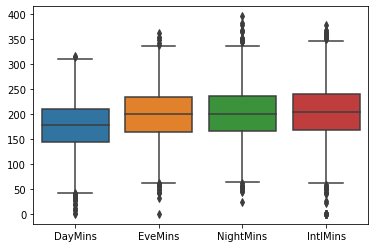

In [18]:
sns.boxplot(data=user_4_features)

In [16]:
user_4_features['IntlMins']=user_4_features['IntlMins']*20

In [17]:
user_segment_3c4f = kmean.set_params(n_clusters=3).fit(user_4_features)

In [20]:
joblib.dump(user_segment_3c4f,'finalized_model_3c4f.model')
segment_model=joblib.load('finalized_model_3c4f.model')
segment_result=segment_model.predict(user_4_features)

Text(0.5, 1.0, 'Cluster member')

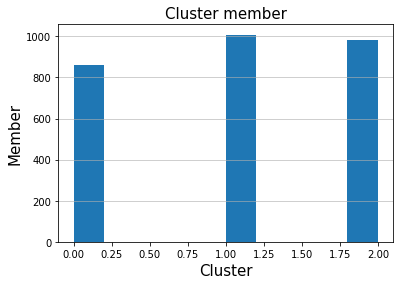

In [21]:
plt.hist(segment_result)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Member',fontsize=15)
plt.title('Cluster member',fontsize=15)

# หาจำนวน Cluster ที่เหมาะสม (เลือกผลการจัดกลุ่มที่เหมาะสม)
* ใช้วิธีดูจุดหักศอก (Elbow method)
* Silhouette


In [22]:
from sklearn.metrics import silhouette_score
clusters=range(2,10)
n_clus=len(clusters)
wcsse=[0]*n_clus
silhouette_avg=[0]*n_clus
for i in range(0,n_clus):
    user_segment = kmean.set_params(n_clusters=clusters[i]).fit(user_feature)
    silhouette_avg[i] = silhouette_score(user_feature, user_segment.labels_)
    wcsse[i]=user_segment.inertia_

Text(0.5, 0, 'Number of cluster')

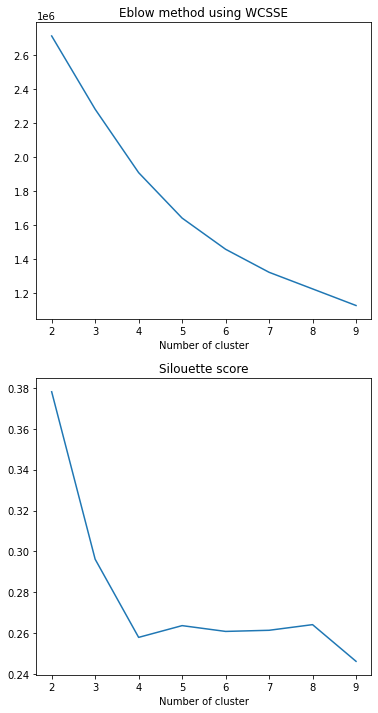

In [23]:
f, axes = plt.subplots(2, 1)
f.set_size_inches(w=6,h=12)
sns.lineplot(x=clusters,y=wcsse,ax=axes[0])
axes[0].set_title("Eblow method using WCSSE")
axes[0].set_xlabel('Number of cluster')
sns.lineplot(x=clusters,y=silhouette_avg,ax=axes[1])
axes[1].set_title("Silouette score")
axes[1].set_xlabel('Number of cluster')

# Application
* Segmentation
* Outlier/Anomaly analysis

## Segmentation
* ตีความแต่ละ cluster
* บันทึกโมเดลเพื่อใช้งานกับข้อมูลใหม่
* ระบุ segment/cluster ของข้อมูลใหม่

In [24]:
selected_n_cluster=3
user_segment = kmean.set_params(n_clusters=selected_n_cluster).fit(user_feature)
centroids=pd.DataFrame(user_segment.cluster_centers_,columns=['DayMins',	'EveMins',	'NightMins'])
centroids

,DayMins,EveMins,NightMins
0,142.736744,185.828372,194.426977
1,248.735036,258.602190,183.500000
2,268.506870,207.729008,245.691603


In [ ]:
# บันทึกโมเดลไว้ใช้ต่อ
from sklearn.externals import joblib
joblib.dump(user_segment,'finalized_model.model')

In [ ]:
# ทดลองโหลด โมเดลมาใช้
segment_model=joblib.load('finalized_model.model')
segment_result=segment_model.predict(user_feature)

plt.hist(segment_result)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Member',fontsize=15)
plt.title('Cluster member',fontsize=15)

## Final Model pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler
class SelectFeature(TransformerMixin):

    def __init__(self,feature=['DayMins',	'EveMins','NightMins']):
        """Select columns.

        """
        self.feature=feature
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.feature]


selectFeature=SelectFeature(feature=['DayMins',	'EveMins','NightMins'])
#normalize_zscore=StandardScaler(with_mean=True, with_std=True)
kmean=KMeans(n_clusters=8)

models = Pipeline([
  ('feature', selectFeature),
 # ('zscore', normalize_zscore),
  ('segmentation', kmean)
])

# ฝึกโมเดลใน Pipeline 
model=models.fit(telco_user.loc[telco_user.Churn==0])

from sklearn.externals import joblib
joblib.dump(model,'pipeline_model.model')

In [ ]:
segment_model=joblib.load('pipeline_model.model')
segment_result=segment_model.predict(telco_user.loc[telco_user.Churn==0])

plt.hist(segment_result)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Member',fontsize=15)
plt.title('Cluster member',fontsize=15)

## Outlier/Anomaly analysis

In [ ]:
# หาระยะระหว่างข้อมูลกับจุด
distance2centroids =np.array(user_segment.transform(user_feature))
distance2my_centroid=pd.DataFrame(distance2centroids.min(axis=1),columns=['Distance2centroid'])

In [ ]:
sns.boxplot(distance2my_centroid)

In [ ]:
sns.distplot(distance2my_centroid, hist = True, kde = True,
                 kde_kws = {'linewidth': 3})

In [ ]:
# ระบุแถวที่เป็น outlier ที่อยู่ห่างจาก centroid ของตัวเองมากกว่า Q3 + 1.5 * IQR
Q1 = distance2my_centroid.quantile(0.25)
Q3 = distance2my_centroid.quantile(0.75)
IQR = Q3 - Q1

outlier_index=(distance2my_centroid > (Q3 + 1.5 * IQR))
outlier_index.any(axis=1).value_counts().plot.bar()

In [ ]:
# เลือกเอาเฉพาะข้อมูลที่ไม่เป็น outlier
cleaned_data=user_feature.loc[list(~outlier_index.Distance2centroid)]
cleaned_data

In [ ]:
# เลือกเอาเฉพาะข้อมูลที่เป็น outlier
outlier_data=user_feature.loc[list(outlier_index.Distance2centroid)]
outlier_data

## ฝึกปฏิบัติ 2
ใช้ fearure DayMins,	EveMins,	NightMins,	IntlMins 
1. ทดลองสร้างโมเดลโดยหาว่าควรใช้จำนวนกลุ่มเท่าไหร่จึงจะเหมาะสมแล้วบันทึกไว้ใช้งาน
2. หาผู้ใช้ที่มีพฤติกรรมสุดโต่งจากกลุ่มของตัวเอง (outlier)

# อธิบายเพิ่มเติม
* kmean=KMeans() คือการสร้าง Object ชนิด KMeans ซึ่งการตั้งค่าต่าง ๆ สามารถกำหนดทีหลังได้โดยใช้ฟังก์ชัน set_params

```
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto' random_state=None, 
       tol=0.0001, verbose=0)
```

* result=kmean.set_params(n_clusters=n_cluster).fit(data) คือการกำหนดจำนวน cluster ตามที่เราต้องการแล้วทำการจัดกลุ่มข้อมูลที่อยู่ใน data จากนั้นเก็บผลของการจัดกลุ่มไว้ใน result

```
คำสั่งที่ใช้บ่อย
- fit(data) จัดกลุ่มข้อมูลที่ระบุเพื่อให้ได้โมเดล ผลลัพธ์ที่ใช้บ่อยคือ
   - cluster_centers_ เก็บ centroids หลังจากเรียนรู้จากข้อมูลแล้ว
   - inertia_ เก็บ WCSSE
   - labels_ เก็บ label ระบุว่าข้อมูลใน data นั้นอยู่กลุ่มไหน
- transform(data) วัดระยะห่างระหว่างข้อมูลใน data กับ centroid ทุกตัว
- predict(data) ระบุกลุ่มให้ข้อมูลใน data
```
## สิ่งที่ควรวิเคราะห์เพิ่มเติม
* การทำ standardization ก่อนการจัดกลุ่มข้อมูล
* การใช้ Clustering แบบอื่นเพื่อจัดกลุ่มที่แต่ละกลุ่มมีขนาดและรูปร่างแตกต่างกันได้ดี เช่น Gaussian Mixture Model (GMM)
